# Image Processing Assignment 3

Bereket Kebede, Grad student <br>
University of Memphis, Spring 2022 <br>
Instructor: Dr. Yeasin <br>

## Getting started
----

#### Contents: 
A) Display basis functions of 2-D discrete Fourier Transform Kernel <br>
B) Show the importance of Phase and Amplitude of a 2-D signal <br>
C) Show the effect of Gibbs phenomenon on an image. <br>
D) Show the effect of frequency resolution. <br>
E) Show the differences between DFT and DCT in compressing linear signal. <br>

In [1]:
##################################################
# Import necessary libraries

import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy

from matplotlib import cm
from itertools import product
from tqdm import tqdm

In [2]:
##################################################
# Defining functions 


# discrete fast fourier transform (dfft) using numpy
# returns the fourier tranform of a 2d image give an input image in spatial domain
def dfft_numpy(img):
    new_image = np.fft.fftshift(np.fft.fft2(img))
    return new_image

def idfft_numpy(img):
    new_image = np.fft.ifft2(np.fft.ifftshift(img))
    return new_image

# mean square error, measures similarity between two images
def mse(imageA, imageB, round_flag):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # The two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    err /= (255*255)
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return round(err, round_flag)

# normalized mean square error, 

def nrmse(imageA, imageB, round_flag):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # The two images must have the same dimension
    err = np.sum((imageA.astype("float")/np.max(imageA) - imageB.astype("float")/np.max(imageB)) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return round(err, round_flag)


## A) Display basis functions of 2-D discrete Fourier Transform Kernel.

Logic: DFT (Discrete Fourier Transform) is based on complex orthonormal basis vectors. <br>

![ex](Images/2D_basis_vectors.PNG)

Ref: Lecture Note, page 23.

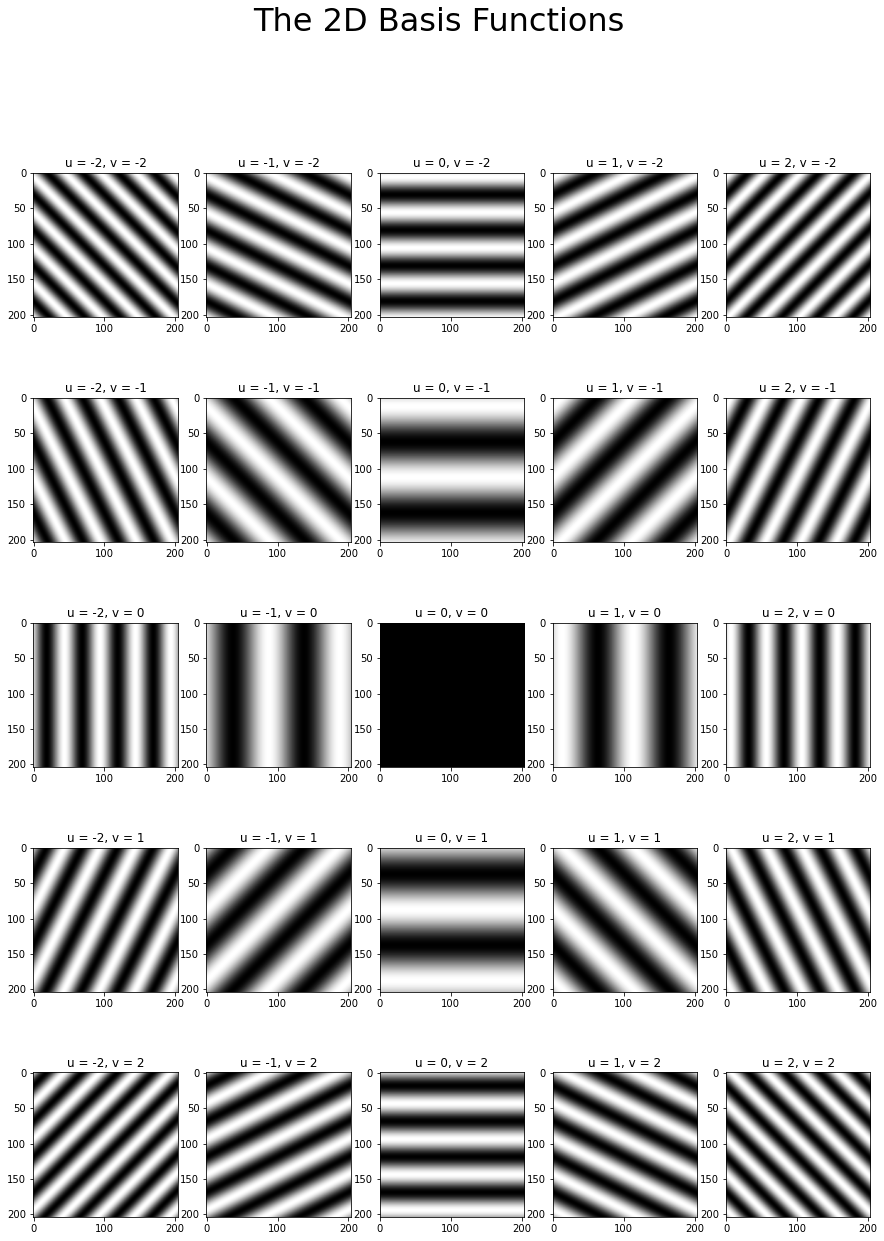

In [3]:
x = np.arange(-100, 101, 0.99)
X, Y = np.meshgrid(x, x)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,20))

plt.suptitle('The 2D Basis Functions', fontsize=32)

count =0
for v in range(-2,3,1):
  for u in range (-2,3,1):
    #print("u:%d  v:%d" %(u,v))
    angle = 2*np.pi*(-u*X + v*Y)
    # using euler from exp to trig
    basis = (np.cos(angle) + np.sin(angle)) 
    axes[v+2,u+2].imshow(basis, cmap = "gray")
    axes[v+2,u+2].set_title('u = %d, v = %d' % (u, v) )
    count +=1

## B) Show the importance of Phase and Amplitude of a 2-D signal

![ex](Images/Significance_of_Phase.PNG)

Logic: Phase contain more information about the imaage compared to the amplitude. There are different combination of numbers that can result in similar amplitude.

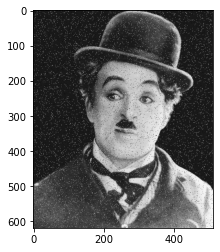

In [4]:
##################################################
# Import an arbitrary image 

img_b = cv2.imread('Data/Chaplin.png', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img_b, cmap='gray')

Text(0.5, 1.0, 'FFT')

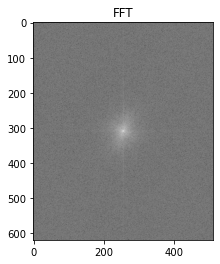

In [5]:
Fourier_img = dfft_numpy(img_b)
plt.imshow(np.log(abs(Fourier_img)), cmap ='gray')
plt.title('FFT')

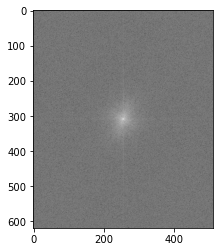

In [6]:
amplitude = np.abs(Fourier_img)
plt.imshow(10*np.log(abs(amplitude)), cmap ='gray')

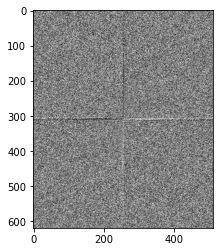

In [7]:
phase = np.angle(Fourier_img)
plt.imshow(phase, cmap ='gray')

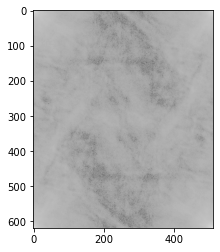

In [8]:
inverse_using_amplitude = idfft_numpy(amplitude)
plt.imshow(10*np.log10(np.abs(inverse_using_amplitude)), cmap ='gray')

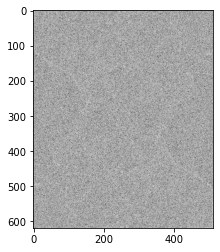

In [9]:
inverse_using_phase = idfft_numpy(phase)
plt.imshow(10*np.log10(np.abs(inverse_using_phase)), cmap ='gray')

Text(0.5, 1.0, 'Reconstructing using Phase')

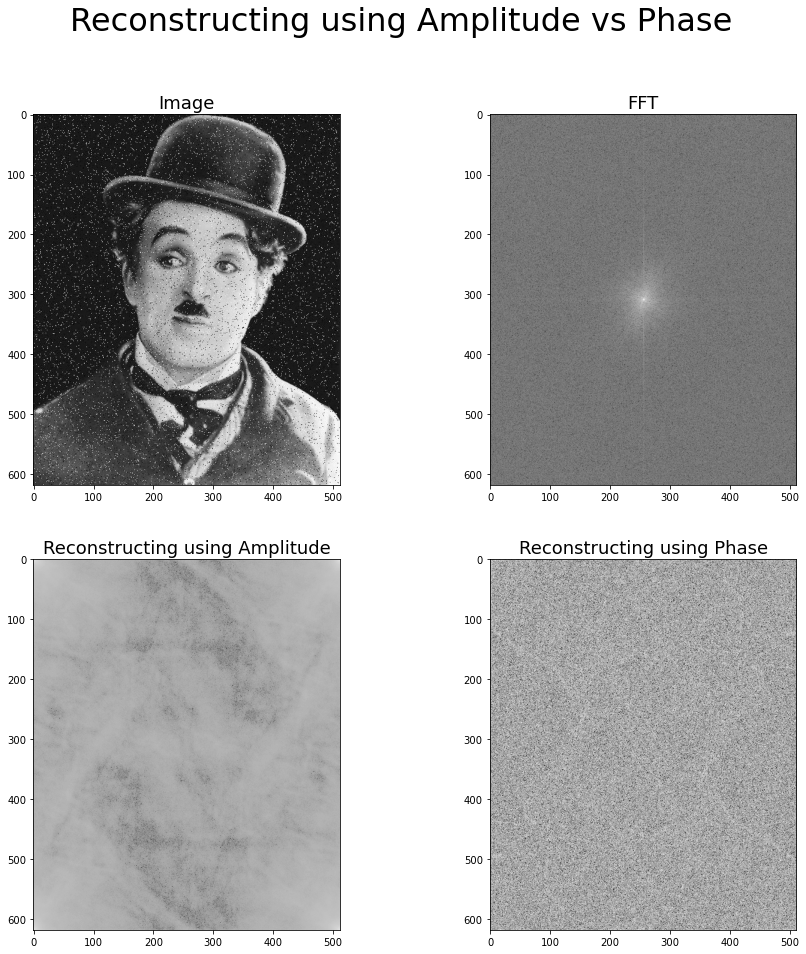

In [10]:
imgs = [img_b, np.log(abs(Fourier_img)), np.log(abs(inverse_using_amplitude)), np.log(abs(inverse_using_phase)) ]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))



plt.suptitle ('Reconstructing using Amplitude vs Phase', fontsize=32)
for ax, img in zip(axs.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)
    
axs[0,0].set_title('Image', fontsize=18)
axs[0,1].set_title('FFT', fontsize=18)
axs[1,0].set_title('Reconstructing using Amplitude', fontsize=18)
axs[1,1].set_title('Reconstructing using Phase', fontsize=18)

## C) Show the effect of Gibbs phenomenon on an image.

Logic: 

When the DFT transform coefficients are truncated or quantized, the Gibbs phenomenon‡ causes the boundary points to take on erroneous values, which appear in an image as blocking artifact. That is, the boundaries between adjacent subimages become  visible because the boundary pixels of the subimages assume the mean values of discontinuities formed at the boundary points.

[i] Gonzalez, 4th edition, page 745

In [11]:
# Low-pass filter based on radius D from the center of FFT
def gibbs(img, D):
    W, H = img.shape
    f_img = dfft_numpy(img)
    f = np.zeros((W,H), dtype=complex)
    
    # center of the fourier transform
    c_x, c_y = W/2, H/2
    
    # Low-pass filter by thresholding 
    for u in range(W):
        for v in range(H):
            
            radius = np.sqrt((u - c_x) ** 2 + (v - c_y) ** 2)
            if radius <= D:
                f[u,v] = f_img[u,v]
            else:
                f[u,v] = 0

    final = idfft_numpy(f)
    
    return np.absolute(final)

(500, 500)


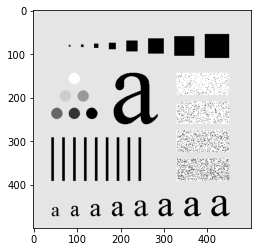

In [12]:
img_c = cv2.imread('Data/letter.tif', cv2.IMREAD_GRAYSCALE)
print(img_c.shape)
plt.imshow(img_c, cmap=cm.gray)
plt.show()

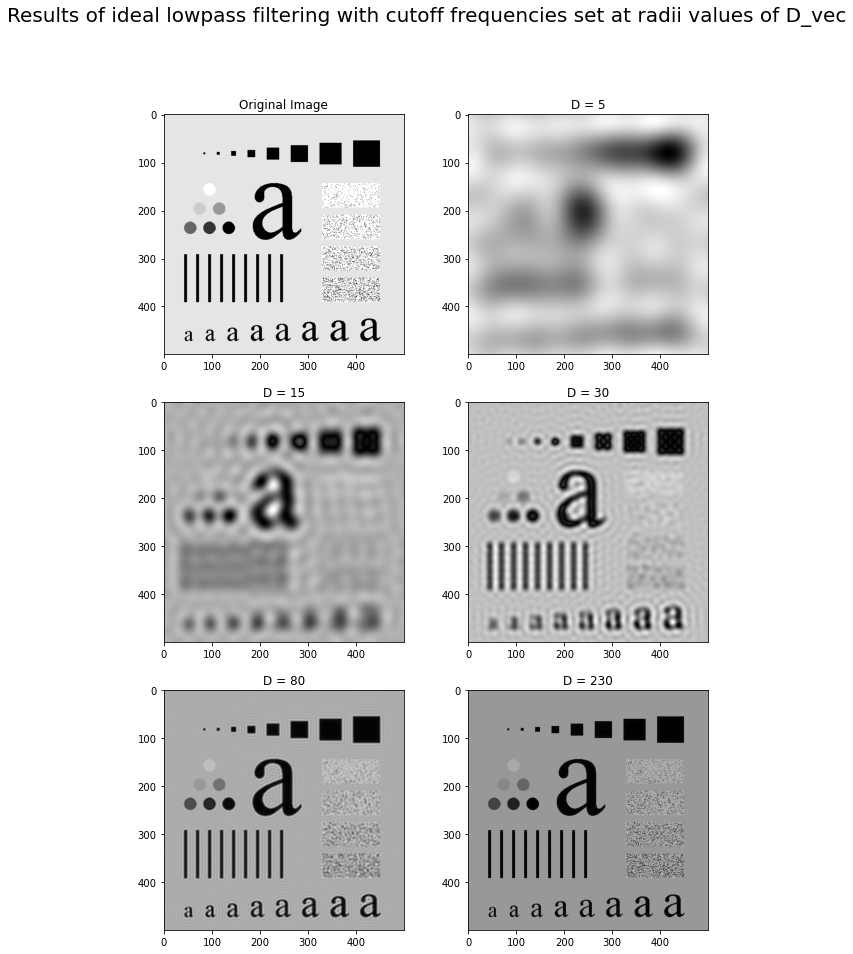

In [13]:
D_vec = [5,15,30,80,230]

imgs = [img_c]
for D in D_vec:
    imgs.append(gibbs(img_c, D))
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

plt.suptitle('Results of ideal lowpass filtering with cutoff frequencies set at radii values of D_vec', fontsize=20)

axes.flatten()[0].set_title('Original Image')
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)
    
for i in range(1, 6):
    axes.flatten()[i].set_title('D = {}'.format(D_vec[i-1]))

## D, E) Show the differences between DFT (Discrete Fourier Transform) and DCT (Discrete Cosine Transform) in compressing linear signal


Logic: 

Major difference is that DCT is purely real while taking a DFT of a signal can give you complex signal. The basis for both are them are different. To analyse the frequency content of the signal, we use DFT. DCT is more of used in compression [5]. The difference between the two is the type of basis function used by each transform; the DFT uses a set of harmonically-related complex exponential functions, while the DCT uses only (real-valued) cosine functions [6]. <br> 

Discrete cosine transform has roughly the same frequency range as that of the Fourier transform, but **twice the frequency** resolution. The information packing ability of the DCT is superior to that of the DFT. DFT and DCT basis images are fixed (input independent) and are the most frequently used in image compression. DCT, which provides a good compromise between information packing ability and computational complexity. In fact, the properties of the DCT have proved to be of such practical value that the DCT is an international standard for transform coding systems.

<br><br>

**DFT Transform**

$f(x,y)$ <=> $R(u,v)$ odd; $I(u,v)$ even 


x, y, u, and v are discrete (integer) variables, with x and u in the range [0,M − 1], and y and v in the range [0,N − 1]. <br>

x, y : spatial domain <br>
u, v : frequency domain  <br>

<br><br>

In [14]:
from scipy.fftpack import fft, dct, dctn, idctn

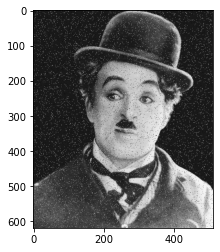

In [15]:
img_e = cv2.imread('Data/Chaplin.png', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img_e, cmap='gray')

In [16]:
DFT_transform = dfft_numpy(img_e)
DFT_transform_inverse = idfft_numpy(DFT_transform)
DCT_transform = dctn(img_e)
DCT_transform_inverse = idctn(DCT_transform)

(619, 512)
proof DFT elemenets are complex:  (18502.470186105926-20553.85049106273j)
mean square error after decompresion:  2.6229527705885213e-31


Text(0.5, 1.0, 'DFT transform inverse')

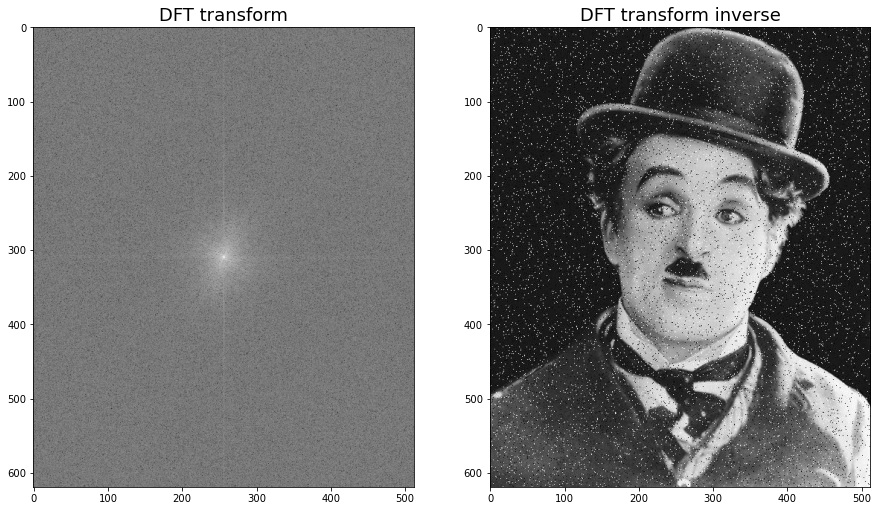

In [17]:
print(DFT_transform.shape)
print('proof DFT elemenets are complex: ', DFT_transform[0,0])
print('mean square error after decompresion: ', nrmse(np.abs(DFT_transform_inverse), img_e, 100))


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,15))


axs[0].imshow(np.abs(np.log(DFT_transform)), cmap = 'gray')
axs[1].imshow(np.abs(DFT_transform_inverse), cmap = 'gray')


axs[0].set_title('DFT transform', fontsize=18)
axs[1].set_title('DFT transform inverse', fontsize=18)

(619, 512)
proof DCT elemenets are real:  101574304.00000003
mean square error after decompresion:  4.144020638352432e-31


Text(0.5, 1.0, 'DCT transform inverse')

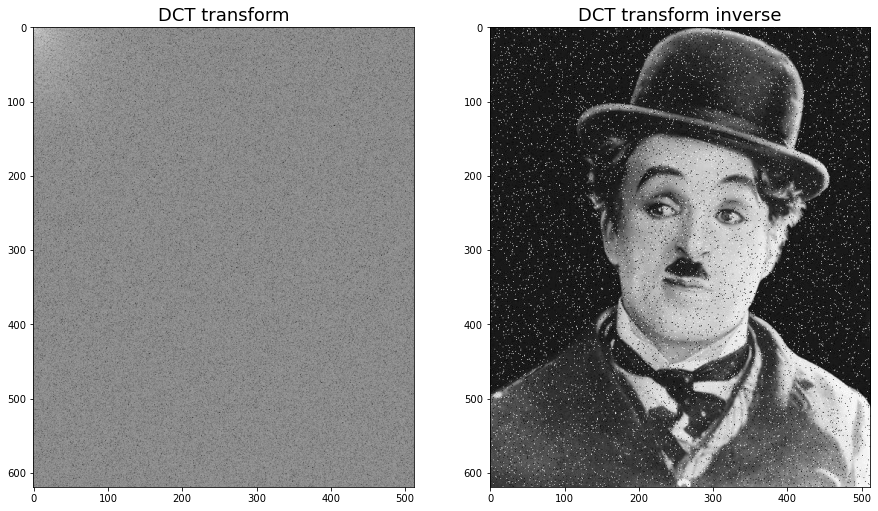

In [18]:
print(DCT_transform.shape)
print('proof DCT elemenets are real: ', DCT_transform[0,0])
print('mean square error after decompresion: ', 
      nrmse(np.abs(DCT_transform_inverse/np.max(DCT_transform_inverse)), img_e/np.max(img_e), 100))


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,15))


axs[0].imshow(np.abs(np.log(np.abs(DCT_transform))), cmap = 'gray')
axs[1].imshow(np.abs(DCT_transform_inverse), cmap = 'gray')


axs[0].set_title('DCT transform', fontsize=18)
axs[1].set_title('DCT transform inverse', fontsize=18)

Reference

[1] 2D Fourier transform in numpy: https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html <br>
[2] Real part of a complex number numpy: https://numpy.org/doc/stable/reference/generated/numpy.real.html <br>
[3] framework: https://github.com/kmnuddin/image_processing_EECE_7241/blob/master/HW_3/ <br>
[4] http://www.add.ece.ufl.edu/4511/references/ImprovingFFTResoltuion.pdf <br>
[5] https://www.quora.com/What-are-the-differences-and-similarities-between-the-DFT-and-the-cosine-transform#:~:text=Major%20difference%20is%20that%20DCT,more%20of%20used%20in%20compression. <br>
[6] https://dsp.stackexchange.com/questions/13/what-is-the-difference-between-a-fourier-transform-and-a-cosine-transform <br>
[7] Fourier Transform Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html <br>
[8] Frequency resolution: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html <br>
[9] Display images in notebook: https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook <br>
[10] Fourier transform from scratch: https://medium.datadriveninvestor.com/fourier-transform-for-image-processing-in-python-from-scratch-b96f68a6c30d  <br>
[11] Numpy Inverse Fourier Transform: https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html <br>
[12] Scipy inverse fourier transform: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html <br>
[13] Scipy Inverse DCT : https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.idct.html